In [17]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict , Literal

In [ ]:
###Defying State:
class QuadraticState(TypedDict):
    a:int
    b:int
    c:int
    equation:str
    discriminant:int
    result:str

In [ ]:
def show_equation(state:QuadraticState):
    a=state["a"]
    b=state["b"]
    c=state["c"]
    equation=f'The Equation is:{a}x^2 +{b}x+{c}=0'
    state['equation']=equation

    return {'equation':equation}

In [7]:
def calculate_discriminant(state:QuadraticState):
    a=state["a"]
    b=state["b"]
    c=state["c"]
    discriminant=b**2 - 4*a*c
    state["discriminant"]=discriminant

    return {'discriminant':discriminant}

In [13]:
def real_roots(state:QuadraticState):
    a=state["a"]
    b=state["b"]
    c=state["c"]
    discriminant=state["discriminant"]
    root1=(-b + discriminant**0.5)/(2*a)
    root2=(-b - discriminant**0.5)/(2*a)
    result=f'The roots are real and different: {root1} and {root2}'
    state["result"]=result

    return {'result':result}

In [14]:
def no_real_roots(state:QuadraticState):
    result='The equation has no real roots.'
    state["result"]=result

    return {'result':result}

In [16]:
def repeated_roots(state:QuadraticState):
    a=state["a"]
    b=state["b"]
    discriminant=state["discriminant"]
    root=-b/(2*a)
    result=f'The roots are real and repeated: {root}'
    state["result"]=result

    return {'result':result}

In [20]:
####Routing Function:
def Checking_function(state:QuadraticState)-> Literal['no_real_roots','repeated_roots','real_roots']:
    discriminant=state["discriminant"] 
    if discriminant <0:
        return 'no_real_roots'
    elif discriminant ==0:
        return 'repeated_roots'
    else:
        return 'real_roots'

In [22]:
### Defining Graph:
graph=StateGraph(QuadraticState)

### Add the Node:
graph.add_node(name="show_equation",node=show_equation)
graph.add_node(name="calculate_discriminant",node=calculate_discriminant)
graph.add_node(name="no_real_roots",node=no_real_roots)
graph.add_node(name="real_roots",node=real_roots)
graph.add_node(name="repeated_roots",node=repeated_roots)


### Define the edges:
graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")
graph.add_edge("no_real_roots", END)
graph.add_edge("repeated_roots", END)
graph.add_edge("real_roots", END)

### add conditional edges:
graph.add_conditional_edges("calculate_discriminant",Checking_function)

### Compile the graph:
workflow=graph.compile()

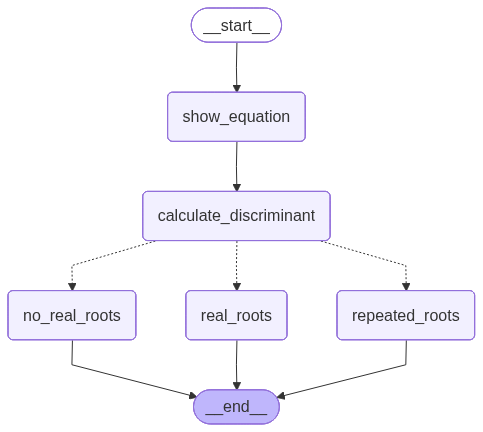

In [23]:
workflow

In [24]:
initial_state={
    "a":1,"b":5,"c":6
}
result=workflow.invoke(initial_state)
print(result)

{'a': 1, 'b': 5, 'c': 6, 'equation': 'The Equation is:1x^2 +5x+6=0', 'discriminant': 1, 'result': 'The roots are real and different: -2.0 and -3.0'}
